**WORKFLOW OF THE PROJECT :-**

1. DATASET
2. IMAGE PROCESSING
3. TRAIN TEST SPLIT
4. NEURAL NETWORK
5. FINALLY, NEW IMAGE -> TRAINED NEURAL NETWORK -> HANDWRITTEN DIGIT PREDICTION



IMPORTING THE NECESSARY LIBRARIES ----

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix



LOADING THE MNIST DATA FROM KERAS.DATASETS


In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# shape of the numpy array

#all the images are gray-scaled

print((X_train.shape, Y_train.shape), (X_test.shape, Y_train.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (60000,))


Training data = 60,000 images
Testing data = 30,000 images
Dimension of each image = 28 x 28
Gray-Scaled Images

In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


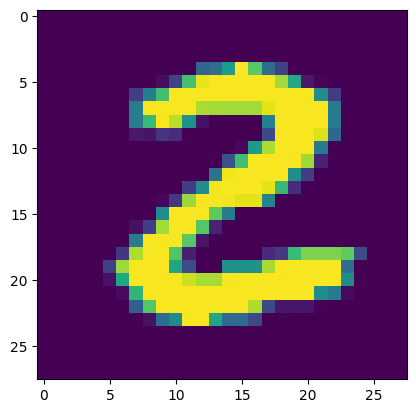

2


In [ ]:
plt.imshow(X_train[25])
plt.show()

#printing the corresponding label
print(Y_train[25])

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in Y_train
import numpy as np
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


WE CAN USE THESE LABELS AS SUCH OR WE CAN ALSO APPLY ONE HOT ENCODING

ALL THE IMAGES HAVING THE SAME DIMENSIONS IN THE DATASET, IF NOT, WE HAVE TO RESIZE ALL TO THE SAME ONES.

In [ ]:
# scale the vales

X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train, X_test

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

BUILDING THE NEURAL NETWORK


In [ ]:
# setting up the layers of the neural network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          #input layer
                          keras.layers.Dense(50, activation='relu'),
                          #hidden layer
                          keras.layers.Dense(50, activation='relu'),
                          #output layer
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling the neural network

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [ ]:
# training the neural network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8452 - loss: 0.5243
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9550 - loss: 0.1505
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9672 - loss: 0.1082
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9742 - loss: 0.0837
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9791 - loss: 0.0670
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9828 - loss: 0.0557
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9862 - loss: 0.0463
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9880 - loss: 0.0409
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9901 - loss: 0.0339
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.0295


Training Data Accuracy = 0.9908

In [ ]:
#to check testing data accuracy

loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9683 - loss: 0.1176


Testing Data Accuracy = 0.9683

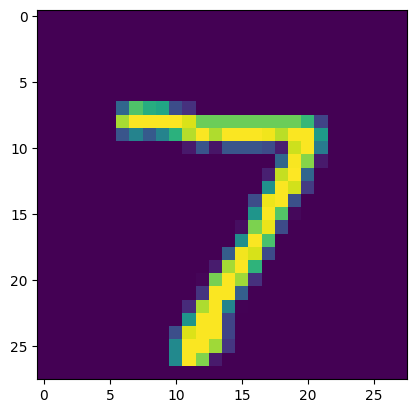

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
plt.imshow(X_test[0])
plt.show()

print(X_train[0])

In [ ]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
#output of this below line will be showing prediction probablity of each class
print(Y_pred[0])

[9.5633138e-03 2.9704833e-01 2.8404314e-02 9.9421197e-01 6.3939484e-07
 2.8585782e-04 2.1454801e-14 1.0000000e+00 7.4715465e-01 9.9179173e-01]


In [ ]:
 #converting the prediction probabilities to class label

 label_for_first_test_image = np.argmax(Y_pred[0])
 print(label_for_first_test_image)

7


In [ ]:
#now converting prediction probabilities for all test pictures

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 6, 0, 7, 1, 1, 2, 1, 

In [ ]:
Y_pred

array([[9.5633138e-03, 2.9704833e-01, 2.8404314e-02, ..., 1.0000000e+00,
        7.4715465e-01, 9.9179173e-01],
       [3.9761225e-10, 4.1575703e-01, 9.9999994e-01, ..., 3.0614924e-06,
        5.5579460e-01, 4.5652691e-09],
       [7.6807497e-05, 9.9935943e-01, 4.7072661e-01, ..., 6.5910518e-01,
        4.1986698e-01, 2.4393788e-05],
       ...,
       [2.6744560e-11, 8.1917678e-06, 9.1669307e-08, ..., 9.9955767e-01,
        9.9368656e-01, 9.9997914e-01],
       [7.0090515e-05, 2.2300531e-03, 3.8816370e-06, ..., 1.6261319e-02,
        9.9102890e-01, 1.3030623e-03],
       [5.2718110e-02, 1.4156285e-07, 7.5727701e-05, ..., 2.7195136e-05,
        8.1500836e-02, 1.8897898e-02]], dtype=float32)

Y_test -> True Labels
Y_pred_labels -> Predicted Labels


In [ ]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 949    0    1    3    2    2    4    1    5   13]
 [   0 1121    4    0    2    1    2    1    4    0]
 [   2    0 1003    8    3    0    3    4    8    1]
 [   0    0    3  984    0    2    1    5    8    7]
 [   0    0    4    0  968    0    4    2    0    4]
 [   1    0    0   23    2  842    3    1   12    8]
 [   6    2    2    1    4    7  936    0    0    0]
 [   0    2    8    4    1    0    0  992    3   18]
 [   1    2    4    6    2    0    8    6  942    3]
 [   1    3    0    1   17    2    0    4    9  972]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

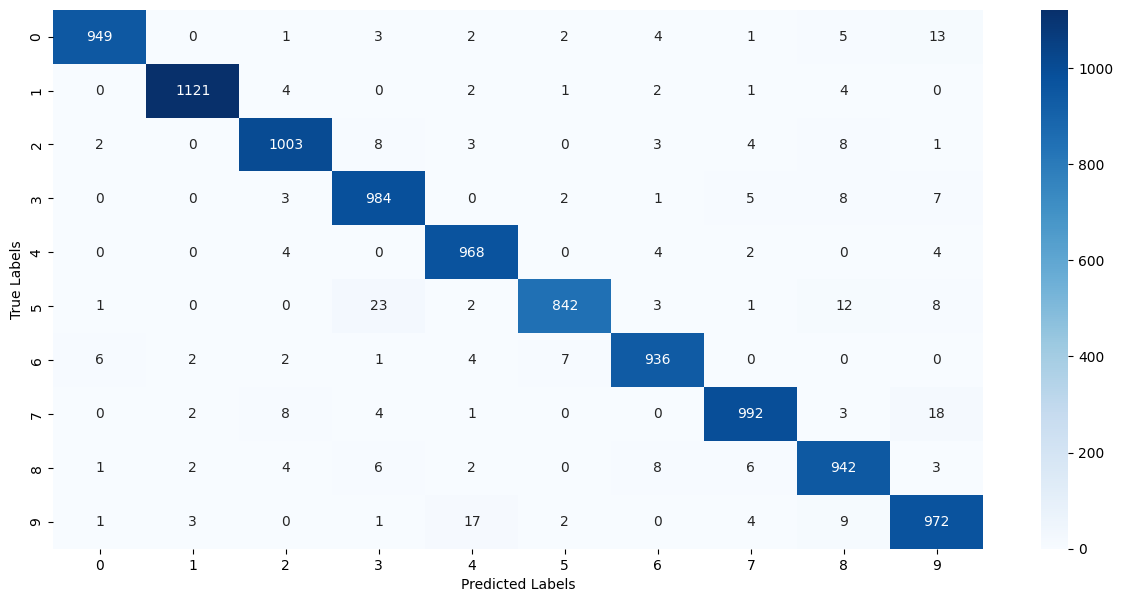

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [ ]:
input_image_path = '/content/testimg.png'

input_image = cv2.imread(input_image_path)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [4, 4, 4]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [4, 4, 4]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [4, 4, 4]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [4, 4, 4]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [4, 4, 4]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [4, 4, 4]]], dtype=uint8)
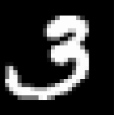

In [ ]:
input_image

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# we hv to convert the image to 28x28 and in greyscale manner
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

array([[0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 4],
       ...,
       [0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 4]], dtype=uint8)
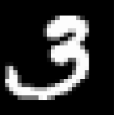

In [ ]:
grayscale

In [ ]:
input_image_resized = cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resized.shape

(28, 28)

In [ ]:
input_image_resized = input_image_resized/255

In [ ]:
image_reshaped = np.reshape(input_image_resized, [1,28,28])

In [ ]:
model.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[2.7783090e-12, 1.9579287e-01, 4.9391337e-02, 1.0000000e+00,
        4.2582618e-10, 7.4085784e-01, 1.3005766e-19, 2.7542629e-10,
        3.7226148e-06, 5.3337485e-06]], dtype=float32)

In [ ]:
print(np.argmax(model.predict(image_reshaped)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
3
